In [111]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import numpy as np

# Loading the data

We will be using the AVAX/USDT data. This can be changed easily by changing the coin in the following line and rerunning the notebook.

In [112]:
parent_path = '/home/jwelliav/Documents/Crypto/data/Binance/'

coin = 'AVAX'

filename = parent_path + coin + '_USDT.csv'

In [140]:
#OHLCV=pd.read_csv('./data/raw/Binance/XRP_USDT.csv')

ohlcv=pd.read_csv(filename, names = ['timestamp','open','high','low','close','volume'])
ohlcv= ohlcv.set_index('timestamp')

In [141]:
ohlcv['pct_change'] = ohlcv.close.pct_change()
ohlcv['log_ret'] = np.log(ohlcv.close) - np.log(ohlcv.close.shift(1))
ohlcv['vol_usdt_K'] = (((ohlcv['open'] + ohlcv['close'])/2)*ohlcv['volume'])/1000
ohlcv = ohlcv.iloc[1:-1]

In [148]:
tmp = [x/1000 for x in (ohlcv.index)]
l = list(map(datetime.fromtimestamp,tmp))

ohlcv['datetime'] = l

In [149]:
ohlcv.describe()

,open,high,low,close,volume,pct_change,log_ret,vol_usdt_K
count,748998.000000,748998.000000,748998.000000,748998.000000,748998.000000,748998.000000,748998.000000,748998.000000
mean,38.768865,38.825848,38.710887,38.768997,2132.922241,0.000007,0.000004,103.493529
std,34.490238,34.534618,34.445520,34.490371,4539.697972,0.002610,0.002614,249.925855
min,2.750500,2.790000,2.750100,2.750500,0.000000,-0.232502,-0.264619,0.000000
25%,11.134000,11.145000,11.121100,11.133000,301.610000,-0.001073,-0.001073,3.431294
50%,28.450100,28.500000,28.400000,28.450500,911.890000,0.000000,0.000000,29.941542
75%,64.750000,64.840000,64.670000,64.750000,2233.835750,0.001079,0.001079,104.796885
max,146.130000,147.000000,145.740000,146.130000,295523.270000,0.096823,0.092418,23774.279543


Selection of data for when the volumes were atleast 100k AVAX and occured after August 2021

In [150]:
ohlcv[(ohlcv.index > 1627810236000) & (ohlcv['volume'] > 100000)].sort_values(by = ['volume'], ascending  = False)[:10]

,open,high,low,close,volume,pct_change,log_ret,vol_usdt_K,datetime
timestamp,,,,,,,,,
1632930840000,62.36,68.28,62.35,68.01,289426.130,0.090603,0.086731,18866.242284,2021-09-30 00:54:00
1644292800000,83.83,95.02,83.83,91.35,271426.870,0.089835,0.086027,23774.279543,2022-02-08 13:00:00
1630431600000,40.53,40.54,38.17,38.79,251920.776,-0.044817,-0.045852,9991.177976,2021-09-01 02:40:00
1631542740000,50.56,50.65,47.66,48.37,226538.680,-0.042368,-0.043292,11205.735806,2021-09-13 23:19:00
1630929840000,46.02,46.38,42.45,43.84,218346.400,-0.047371,-0.048529,9810.303752,2021-09-06 21:04:00
1631436720000,61.05,61.08,59.42,60.82,178094.430,-0.002787,-0.002791,10852.184092,2021-09-12 17:52:00
1632930900000,68.02,69.00,65.83,66.69,175768.830,-0.019409,-0.019600,11838.909545,2021-09-30 00:55:00
1644292860000,91.34,95.50,88.38,90.35,165726.610,-0.010947,-0.011007,15055.433885,2022-02-08 13:01:00
1631801220000,63.65,64.48,63.50,64.00,164308.290,0.005499,0.005484,10486.976609,2021-09-16 23:07:00


In [118]:
def convert_ts(ts):
    ts = ts/1000
    dt = datetime.fromtimestamp(ts)
    return(dt)

In [119]:
x = len(ohlcv)/(60*24)
print('We have roughly {} years of data'.format(x/365))

We have roughly 1.4250342465753425 years of data


In [120]:
ohlcv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748998 entries, 1600756260000 to 1645671420000
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   open        748998 non-null  float64
 1   high        748998 non-null  float64
 2   low         748998 non-null  float64
 3   close       748998 non-null  float64
 4   volume      748998 non-null  float64
 5   pct_change  748998 non-null  float64
 6   log_ret     748998 non-null  float64
dtypes: float64(7)
memory usage: 45.7 MB


In [147]:
ohlcv.head()

,open,high,low,close,volume,pct_change,log_ret,vol_usdt_K
timestamp,,,,,,,,
1600756260000,3.6018,4.4804,3.5897,4.2775,295523.27,0.096823,0.092418,1164.258251
1600756320000,4.2500,4.4351,4.0611,4.1021,137106.97,-0.041005,-0.041870,572.565562
1600756380000,4.1027,4.2000,4.0061,4.1699,117775.14,0.016528,0.016393,487.153312
1600756440000,4.1699,4.1990,4.1076,4.1800,72788.25,0.002422,0.002419,303.887304
1600756500000,4.1704,4.3879,4.0487,4.3350,115621.12,0.037081,0.036410,491.701937


In [122]:
ohlcv.tail()

,open,high,low,close,volume,pct_change,log_ret
timestamp,,,,,,,
1645671180000,73.58,73.58,73.23,73.25,3375.96,-0.004350,-0.004359
1645671240000,73.27,73.46,73.25,73.32,2462.53,0.000956,0.000955
1645671300000,73.32,73.51,72.99,73.05,9885.66,-0.003682,-0.003689
1645671360000,73.07,73.15,72.21,72.23,30540.95,-0.011225,-0.011289
1645671420000,72.24,72.36,71.92,72.03,15874.74,-0.002769,-0.002773


Let's see how AVAX has been doing by plotting the daily closing price over time

In [125]:
tmp = ohlcv[['datetime','close']].set_index('datetime')

Text(0, 0.5, 'Price in USDT')

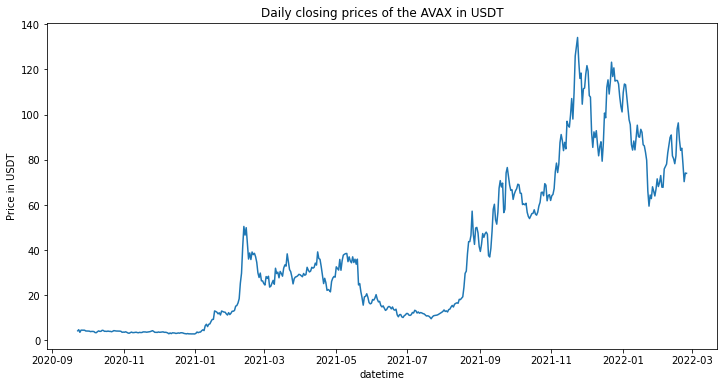

In [126]:
plt.figure(figsize=(12,6))
sns.lineplot(data=tmp.close[::60*24])
plt.title('Daily closing prices of the AVAX in USDT')
plt.ylabel('Price in USDT')

# Analyzing log returns

I computed the log returns based on the closing price of each minute. I'm not too sure how much sense it makes to simultaneousy look at log returns based on opening prices, highs, or lows. Instead I would probably this additional data to compute additional indicators like ATR.

## The disribution

Now let's look at a few characteristics of the log returns:

In [127]:
log_returns = ohlcv['log_ret']

log_returns.describe()

count    748998.000000
mean          0.000004
std           0.002614
min          -0.264619
25%          -0.001073
50%           0.000000
75%           0.001079
max           0.092418
Name: log_ret, dtype: float64

In [130]:
log_returns.agg(['skew', 'kurtosis'])

skew         -1.394504
kurtosis    182.836336
Name: log_ret, dtype: float64

So we definitely have some skewness here and quite heavy tails. The heavy tails were to be expected, as those are a common feature of financial time series. Let's look at a plot of the distribution:

(-0.025, 0.025)

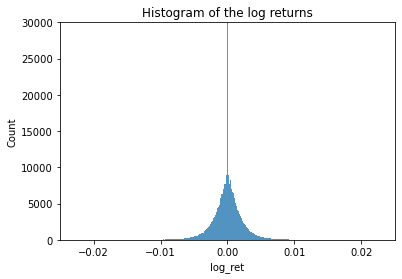

In [129]:
sns.histplot(data=log_returns)
plt.title('Histogram of the log returns')
plt.ylim(0,30000)
plt.xlim(-0.025,0.025)

This does surely have one peak in the middle. Definitely not a normal distribution.

To make different coins more comparible, it might be a good idea to normalize the log returns. I'm not sure whether one should center them, because that would remove the info about the global trend, but dividing out the standard deviation should make them more comparable.

## Autocorrelations

Making the standard assumption that the time series is weakly stationary, it make sense to compute autocorrelations. This would be interesting to do for different timeframes, but for now I'm just looking at minute data.

In [131]:
log_returns.autocorr(lag=2)

-0.0007748586611945352

In [132]:
autocorrs=[[i,log_returns.autocorr(lag=i)] for i in range(1,24*60)]

(-0.012, 0.012)

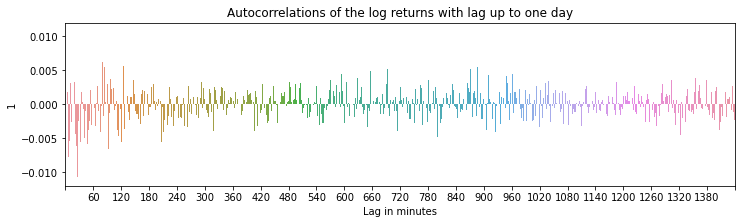

In [133]:
plt.figure(figsize=(12,3))
autocorrs_df=pd.DataFrame(autocorrs)
sns.barplot(x=autocorrs_df.iloc[:,0], y=autocorrs_df.iloc[:,1])
plt.title('Autocorrelations of the log returns with lag up to one day')
plt.xlabel('Lag in minutes')
plt.xticks(range(-1,24*60,60))
plt.ylim(-0.012,0.012)

It's not too hard to compute a bound for these autocorrelations that tells us which of them are actually significant, given some confidence level. I'm too lazy to do that right now, but it looks like within the first two hours, the autocorrelations are pretty strong and afterwards they definitely get smaller, with the occasional outlier.

Let's zoom onto the first two hours:

(-0.04, 0.012)

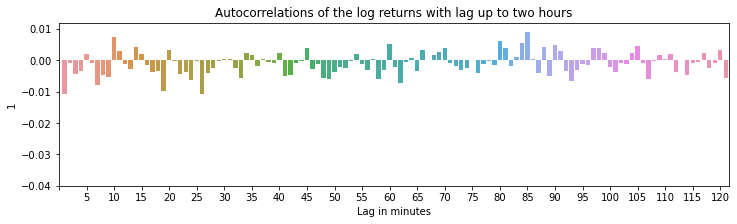

In [135]:
plt.figure(figsize=(12,3))
autocorrs_df=pd.DataFrame(autocorrs)
sns.barplot(x=autocorrs_df.iloc[:121,0], y=autocorrs_df.iloc[:121,1])
plt.title('Autocorrelations of the log returns with lag up to two hours')
plt.xlabel('Lag in minutes')
plt.xticks(range(-1,120,5))
plt.ylim(-0.04,0.012)

That's interesting: it wasn't visible in the previous chart how much the lag-1 autocorrelation dominates all others. But even there, it's a correlation of magnitude 0.03 which might not be statistically significant. And the fact that it's negative is very counterintuitive. One might get more meaningful data on an hourly or daily scale.

# Analyzing the trading volume

## Evolution over time

In [156]:
volumes = ohlcv[['datetime','vol_usdt_K']]
volumes = volumes.set_index('datetime')
volumes.head()

,vol_usdt_K
datetime,
2020-09-22 15:31:00,1164.258251
2020-09-22 15:32:00,572.565562
2020-09-22 15:33:00,487.153312
2020-09-22 15:34:00,303.887304
2020-09-22 15:35:00,491.701937


In [159]:
volumes1 = ohlcv[['datetime','volume']]
volumes1 = volumes1.set_index('datetime')
volumes1.head()

,volume
datetime,
2020-09-22 15:31:00,295523.27
2020-09-22 15:32:00,137106.97
2020-09-22 15:33:00,117775.14
2020-09-22 15:34:00,72788.25
2020-09-22 15:35:00,115621.12


Let's see how the volume has changed over time. To smooth things out, we use a 30-day rolling median.

Text(0, 0.5, 'Volume in USDT in 1000s')

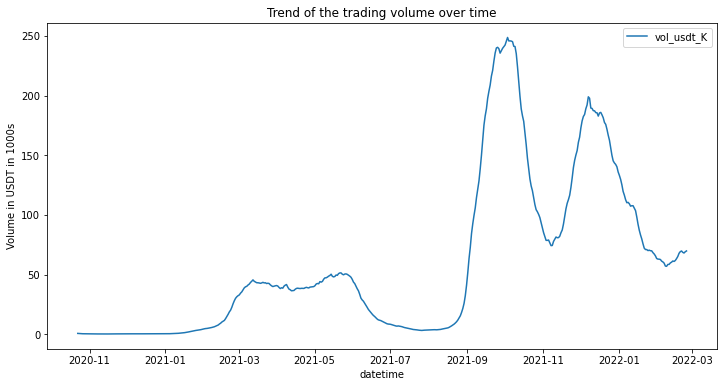

In [154]:
plt.figure(figsize=(12,6))
sns.lineplot(data=volumes.fillna(method='bfill').rolling(43200).median().iloc[::60*24])
plt.title('Trend of the trading volume over time')
plt.ylabel('Volume in USDT in 1000s')

Text(0, 0.5, 'Volume in AVAX')

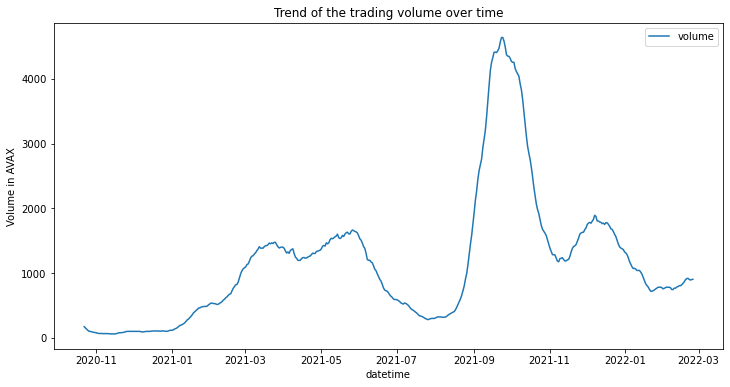

In [160]:
plt.figure(figsize=(12,6))
sns.lineplot(data=volumes1.fillna(method='bfill').rolling(43200).median().iloc[::60*24])
plt.title('Trend of the trading volume over time')
plt.ylabel('Volume in AVAX')

It looks like there is a gradual increase in the trading volume, until it suddenly explodes. I think it would make sense to center the data to compensate at least for the gradual increase.

## The distribution

Now's get some basic characteristics of the distribution...

In [172]:
volumes

,vol_usdt_K
datetime,
2020-09-22 15:31:00,1164.258251
2020-09-22 15:32:00,572.565562
2020-09-22 15:33:00,487.153312
2020-09-22 15:34:00,303.887304
2020-09-22 15:35:00,491.701937
...,...
2022-02-24 11:53:00,247.846103
2022-02-24 11:54:00,180.491136
2022-02-24 11:55:00,723.482027


... and plot a histogram:

(0.0, 250.0)

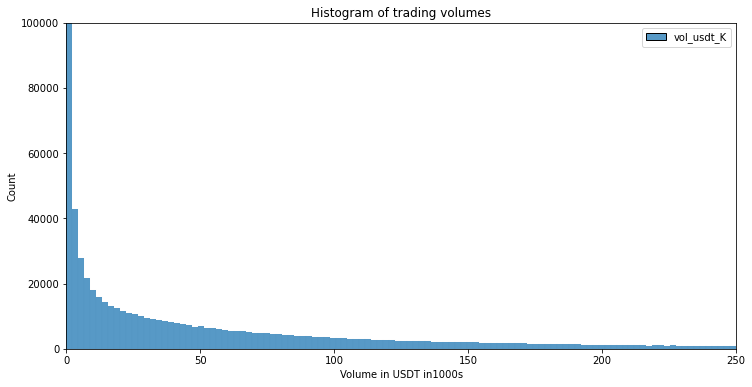

In [166]:
plt.figure(figsize=(12,6))
sns.histplot(data=volumes)
plt.title('Histogram of trading volumes')
plt.ylim(0,100000)
plt.xlabel('Volume in USDT in 1000s')
plt.xlim(0,250)

We can't really see how often the volume is zero:

In [170]:
(volumes==0).mean()

vol_usdt_K    0.051183
dtype: float64

So approximately 5% of the time.

The big problem one has in normalizing this is that volumes always are non-negative. Let's first apply a logarithm. Of course, some care needs to be taken because of the minutes with zero volume.

In [171]:
from math import log
log_volume=volumes.map(lambda x:log(x+0.0000001))
log_volume.describe()

AttributeError: 'DataFrame' object has no attribute 'map'

In [97]:
log_volume.agg(['skew','kurtosis'])

skew        -5.827021
kurtosis    66.117440
Name: V, dtype: float64

(-1.0, 20.0)

<Figure size 864x432 with 0 Axes>

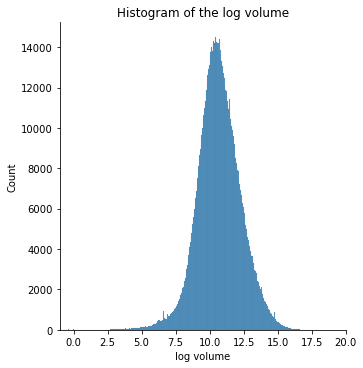

In [123]:
plt.figure(figsize=(12,6))
sns.displot(log_volume, fill=True)
plt.xlabel('log volume')
plt.title('Histogram of the log volume')
plt.xlim(-1,20)

So the distribution is not normal, but rather pleasant. It has a moderate skewness, and slightly heavy tails. What the histogram does not show are the outliers that come from taking volumes that were zero. It is easier to see those on a kde-plot:

Text(0.5, 1.0, 'A kernel density estimate for the log volume')

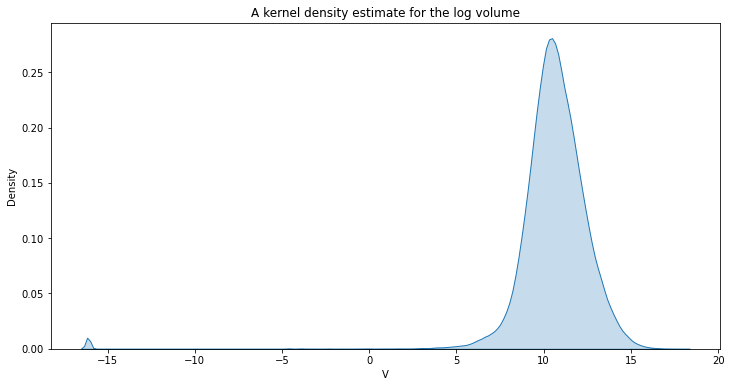

In [126]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=log_volume, fill=True)
plt.title('A kernel density estimate for the log volume')

I'm not exactly sure how to best handle those outliers...

The next step is to normalize the log volume in a way that kills any organic/gradual increase in volume.

In [111]:
log_volume.fillna(method='bfill',inplace=True)
rolling_25=log_volume.rolling(43200).quantile(0.25).fillna(method='bfill')
rolling_50=log_volume.rolling(43200).median().fillna(method='bfill')
rolling_75=log_volume.rolling(43200).quantile(0.75).fillna(method='bfill')
log_volume_normal=(log_volume-rolling_50)/(rolling_75-rolling_25)
log_volume_normal_shift=(log_volume-rolling_50.shift(43200))/(rolling_75.shift(43200)-rolling_25.shift(43200))
log_volumes=pd.DataFrame({
                        'log_volume': log_volume,
                        'log_volume_normal': log_volume_normal,
                        'log_volume_normal_shift': log_volume_normal_shift
                         })


Text(0.5, 1.0, 'Comparison of normalized and unnormalized log volume')

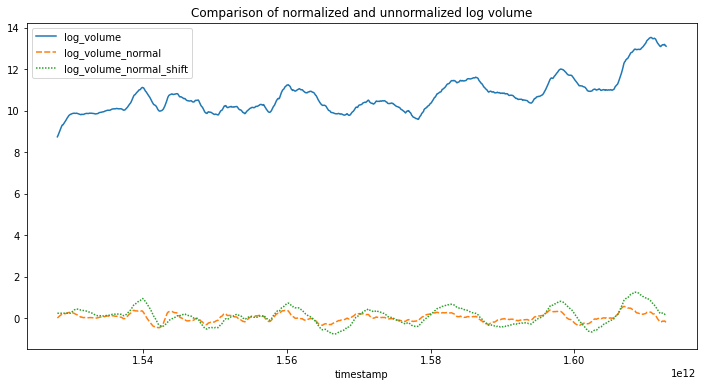

In [120]:
plt.figure(figsize=(12,6))
sns.lineplot(data=log_volumes.fillna(method='bfill').rolling(43200).median().iloc[::60*24])
plt.title('Comparison of normalized and unnormalized log volume')

The normalization that uses shifted rolling quantiles might be preferrable: they kill the organic volume growth and yet see the local bumps in the volume.

Now let's look at the distribution of the normalized log volume:

In [121]:
log_volume_normal_shift.describe()

count    1.412705e+06
mean     4.902027e-02
std      1.208108e+00
min     -2.380327e+01
25%     -4.822220e-01
50%      1.243002e-01
75%      6.694519e-01
max      4.915876e+00
Name: V, dtype: float64

In [124]:
log_volume_normal_shift.agg(['skew','kurtosis'])

skew        -6.075741
kurtosis    88.139128
Name: V, dtype: float64

(-5.0, 5.0)

<Figure size 864x432 with 0 Axes>

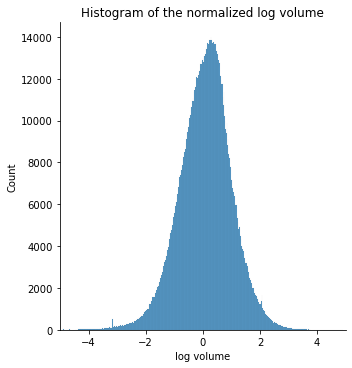

In [130]:
plt.figure(figsize=(12,6))
sns.displot(log_volume_normal_shift, fill=True)
plt.xlabel('log volume')
plt.title('Histogram of the normalized log volume')
plt.xlim(-5,5)

Text(0.5, 1.0, 'A kernel density estimate for the normalized log volume')

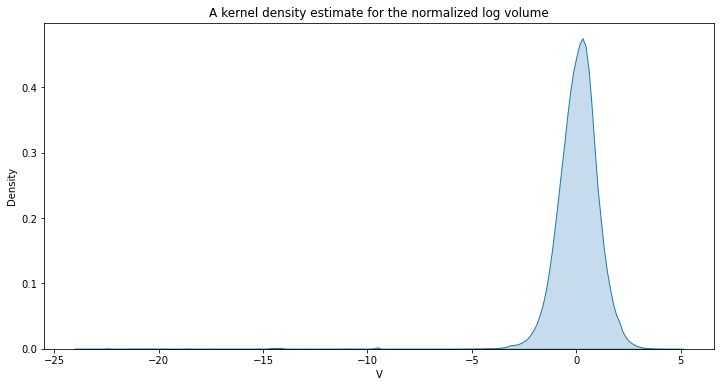

In [127]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=log_volume_normal_shift, fill=True)
plt.title('A kernel density estimate for the normalized log volume')

# The joint distribution

To get an impression of the depency between log return and normalized log volume, let's plot a joint density estimate. Since this is slow, only data for one month is used, but not the most recent month because of the recent XRP pum.

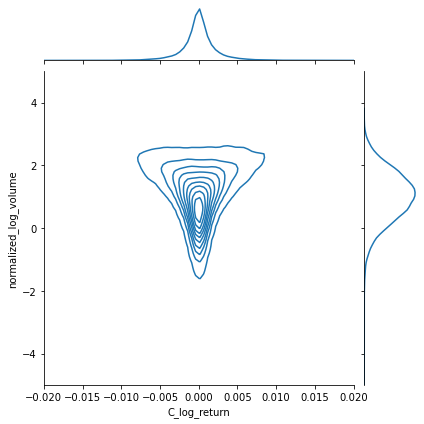

In [143]:
log_volume_normal_shift.name='normalized_log_volume'
sns.jointplot(x=log_returns.iloc[-3*43200:-2*43200],
              y= log_volume_normal_shift.iloc[-3*43200:-2*43200],
              kind='kde',
              xlim=(-0.02,0.02), ylim=(-5,5))

The symmetry around the y-axis tells us that volume is a poor indicator of return. However, we do see that larger volumes lead to a wider range of possible returns. Therefore, the normalized log volume might be an indicator for volatility on the market. 